In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage import exposure
from skimage.feature import hog 
from glob import glob

### Working with labels

In [2]:
labels = pd.read_csv('labels.csv')

In [3]:
labels

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [4]:
labels_dict = {labels.iloc[i]["ClassId"]: labels.iloc[i]["Name"] for i in range(len(labels))}
labels_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vechiles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vechiles',
 16: 'Vechiles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [5]:
img_paths = []
y = []

for class_path in glob('C:\\Users\\Lewis Do\\Documents\\Semester 4\CPV301\\Ass_Trafficsign_Detection\\myData\\*'):
    cpath_replaced = class_path.replace("C:\\Users\\Lewis Do\\Documents\\Semester 4\CPV301\\Ass_Trafficsign_Detection\\myData\\","")
    i = int(cpath_replaced.split("\\")[0])

    for img_path in glob(class_path + "\\*"):
        img_paths.append(img_path)
        y.append(i)

In [6]:
print("There are {} classes in the dataset.".format(len(set(y))))

There are 43 classes in the dataset.


In [7]:
IMG_SIZE = (32,32)

In [8]:
def read_img(img_path, resize=False):
    img = cv2.imread(img_path)
    
    if resize:
        img.resize(IMG_SIZE)

    return np.asarray(img)

In [9]:
sample_img = read_img('C:\\Users\\Lewis Do\\Documents\\Semester 4\\CPV301\\Ass_Trafficsign_Detection\\myData\\0\\00000_00015 - Copie.jpg')
sample_img.shape

(32, 32, 3)

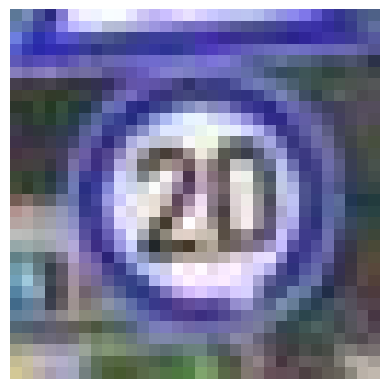

In [10]:
plt.imshow(sample_img)
plt.axis("off")
plt.show()

In [11]:
X = np.asarray([read_img(img_path) for img_path in img_paths])

In [12]:
X.shape

(73139, 32, 32, 3)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54854, 32, 32, 3)
(54854,)
(18285, 32, 32, 3)
(18285,)


## Extracting hog features from images

In [16]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
        hog_feature = hog(image[:, :, 0], orientations=8, pixels_per_cell=(4, 4),
                          cells_per_block=(1, 1), visualize=False)
        hog_features.append(hog_feature)
    return np.array(hog_features)

x_train_fd = extract_hog_features(X_train)
x_test_fd = extract_hog_features(X_test)

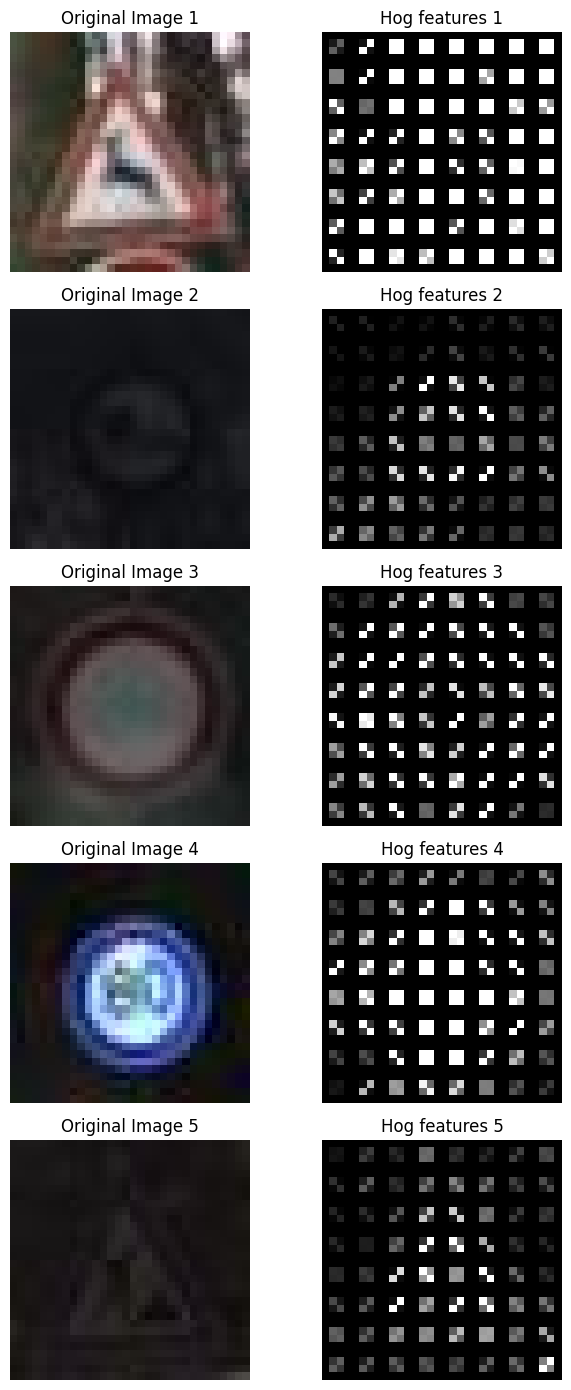

In [17]:
def visualize_hog_features(imgs, n_imgs=5):
    fig, axes = plt.subplots(nrows=n_imgs, ncols=2, figsize=(7,14))
    axes = axes.ravel()

    for i in range(n_imgs):
        img = imgs[i]
        hog_feature, hog_img = hog(img[:, :, 0], orientations=8, pixels_per_cell=(4, 4),
                                     cells_per_block=(1, 1), visualize=True)
        hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0,10))

        axes[2 * i].imshow(img, cmap=plt.cm.gray)
        axes[2 * i].set_title(f'Original Image {i+1}')
        axes[2 * i].axis('off')

        axes[2 * i + 1].imshow(hog_img_rescaled, cmap=plt.cm.gray)
        axes[2 * i + 1].set_title(f'Hog features {i+1}')
        axes[2 * i + 1].axis('off')

    plt.tight_layout()  
    plt.show() 
                           
visualize_hog_features(X_train)

In [18]:
print(x_train_fd.shape)
print(x_test_fd.shape)

(54854, 512)
(18285, 512)


In [67]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train_fd, y_train)

SVC()

In [20]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = svm.predict(x_test_fd)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.81      0.89       109
           1       0.87      0.91      0.89      1229
           2       0.79      0.75      0.77       667
           3       0.91      0.85      0.88       671
           4       0.93      0.92      0.92       927
           5       0.76      0.82      0.79       876
           6       1.00      0.99      1.00       192
           7       0.86      0.86      0.86       686
           8       0.84      0.83      0.83       693
           9       0.96      0.98      0.97       687
          10       0.97      0.97      0.97       955
          11       0.94      0.96      0.95       599
          12       0.99      1.00      0.99       988
          13       1.00      1.00      1.00      1016
          14       0.99      0.97      0.98       400
          15       0.97      0.92      0.95       276
          16       1.00      1.00      1.00       185
          17       1.00    

In [21]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
knn.fit(x_train_fd, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(x_test_fd)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       109
           1       0.83      0.96      0.89      1229
           2       0.80      0.77      0.78       667
           3       0.82      0.79      0.81       671
           4       0.78      0.88      0.83       927
           5       0.75      0.80      0.77       876
           6       0.98      0.99      0.99       192
           7       0.79      0.82      0.81       686
           8       0.86      0.78      0.81       693
           9       0.96      0.95      0.95       687
          10       0.93      0.91      0.92       955
          11       0.89      0.94      0.92       599
          12       0.99      0.98      0.98       988
          13       1.00      1.00      1.00      1016
          14       0.97      0.95      0.96       400
          15       0.97      0.85      0.91       276
          16       0.97      0.99      0.98       185
          17       1.00    

In [23]:
def detect_and_classify(img_path, model, labels_dict, pixels_per_cell=(4,4), cells_per_block=(1,1)):
    
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Unavle to read image at path:", img_path)
        return
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(img, (5,5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


    if len(contours) == 0:
        print("No contours found")
        return
    

    # get maximum contour
    contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(contour)
    bounding_box = gray_img[y:y+h, x:x+w]

    # resize bounding box and extracting hog features
    resized_box = cv2.resize(bounding_box, IMG_SIZE)
    hog_features = hog(resized_box, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=False)
    

    # predicting labels by using model had been trained
    prediction = model.predict([hog_features])[0]
    label = labels_dict.get(prediction, "Unknown")


    # calculate the size of character font for small bounding box
    font_scale = 0.5 # start with a small value
    font_thickness = 1
    (text_width, text_hieight), baseline = cv2.getTextSize(text=label, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=font_thickness)
    
    while text_width < w and text_hieight < h/2:
        font_scale += 0.1
        (text_width, text_hieght), baseline = cv2.getTextSize(text=label, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=font_thickness)

    font_scale -= 0.1

    cv2.rectangle(img=img, pt1=(x, y) ,pt2=(x+w, y+h), color=(0,255,0), thickness=2)
    cv2.putText(img=img, text=label, org=(x, y-10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, color=(0, 255, 0), thickness=font_thickness)


    plt.figure(figsize=(10,8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Traffic Sign")
    plt.show()


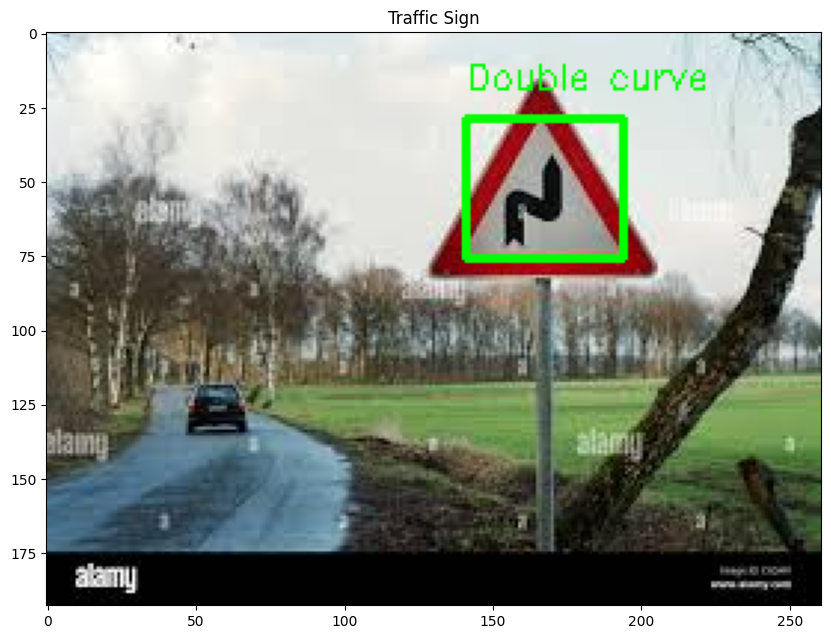

In [54]:
path = 'double_curve.jpg'
detect_and_classify(path, knn, labels_dict)

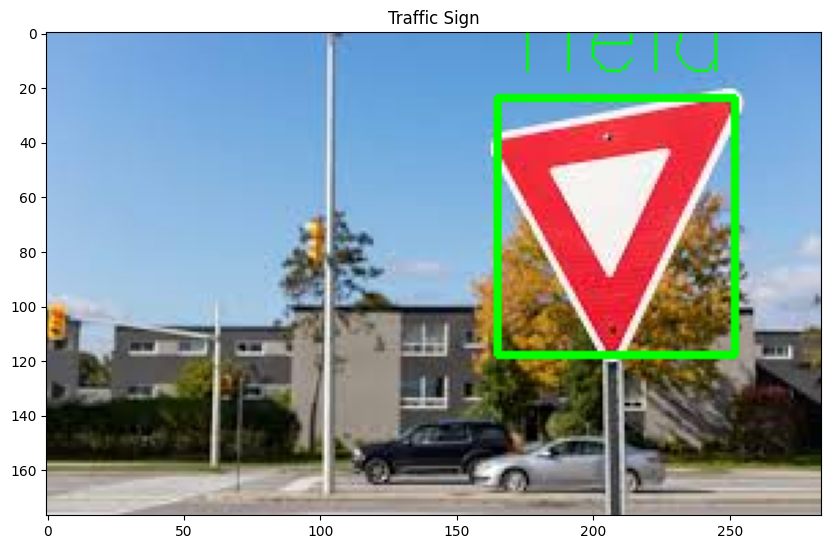

In [52]:
path = 'yield.jpg'
detect_and_classify(path, svm, labels_dict)

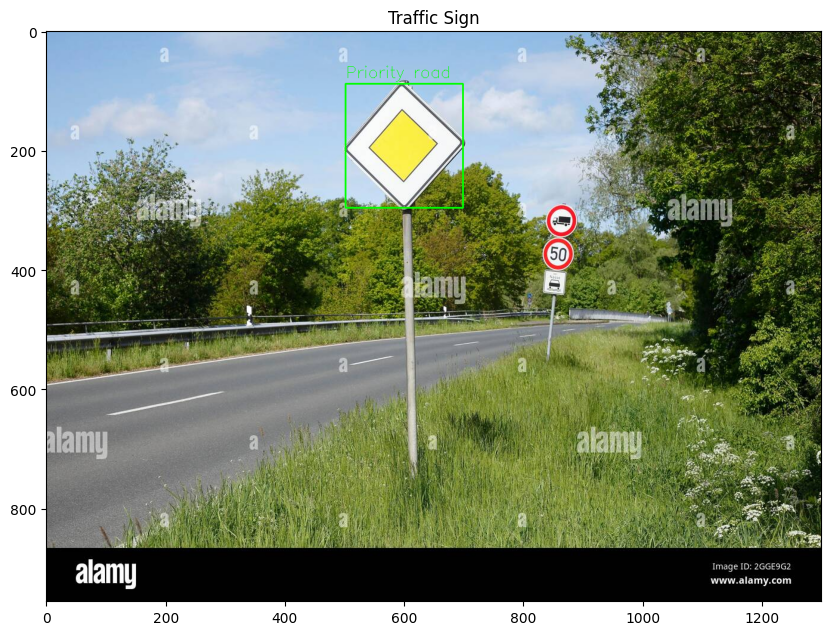

In [51]:
path = 'priority_road.jpg'
detect_and_classify(path, svm, labels_dict)

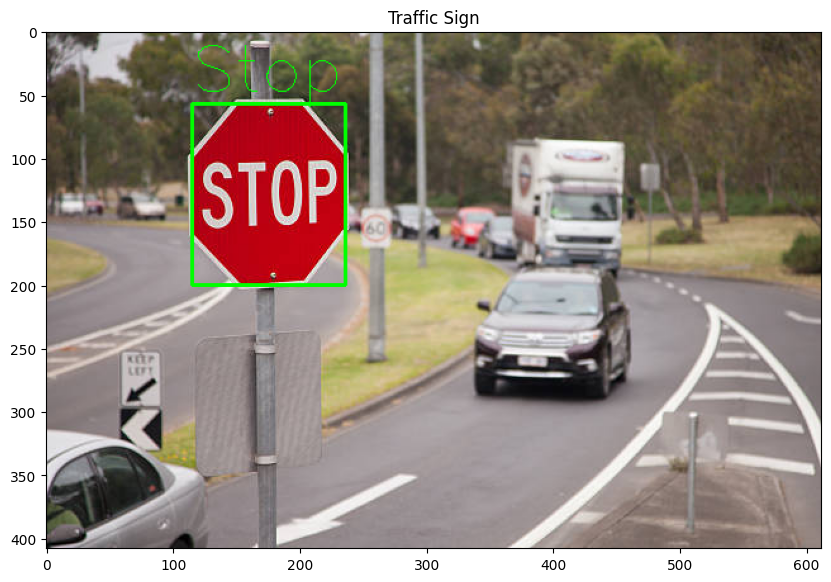

In [50]:
path = 'stop.jpg'
detect_and_classify(path, knn, labels_dict)